# USE CASE CLUSTERING

## ANSWERED BY DWI SMARADAHANA INDRALOKA
***

## Import Library

In [626]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

## Upload CSV Dataset

In [627]:
data = pd.read_csv("automobile-spec.csv")

In [628]:
data.head()

,ID,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheel,engine-loc,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,2,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,3,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,4,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,5,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


## Data Dimension

In [629]:
data.shape

(205, 25)

## Data Type

In [630]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
ID                   205 non-null int64
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         204 non-null object
body-style           205 non-null object
drive-wheel          205 non-null object
engine-loc           205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
cylinder             205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 201 non-null float64
stroke               201 non-null float64
compression-ratio    205 non-null float64
horsepower           203 non-null float64
peak-rpm             203 non-

## Data Cleansing

### 1. Identify the number of missing value

In [631]:
data.isna().sum()

ID                   0
make                 0
fuel-type            0
aspiration           0
num-of-doors         1
body-style           0
drive-wheel          0
engine-loc           0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
cylinder             0
engine-size          0
fuel-system          0
bore                 4
stroke               4
compression-ratio    0
horsepower           2
peak-rpm             2
city-mpg             0
highway-mpg          0
price                4
dtype: int64

### 2. Handle the missing value
* For numerical data we fill the missing value using the mean of the data
* For categorical data we fill the missing value using the mode of the data

In [632]:
data["num-of-doors"].fillna(data["num-of-doors"].mode()[0], inplace = True)

In [633]:
mean1 = data["bore"].mean()
data["bore"].fillna(mean1, inplace = True)

In [634]:
mean2 = data["stroke"].mean()
data["stroke"].fillna(mean2, inplace = True)

In [635]:
data["horsepower"].fillna(data["horsepower"].mode()[0], inplace = True)

In [636]:
data["peak-rpm"].fillna(data["peak-rpm"].mode()[0], inplace = True)

In [637]:
mean4 = data["price"].mean()
data["price"].fillna(mean4, inplace = True)

### 3. Rechecking the missing value

In [638]:
data.isna().sum()

ID                   0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheel          0
engine-loc           0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
cylinder             0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

### 4. Dropping unused columns

In [639]:
data.drop("ID", axis = 1, inplace = True)

In [640]:
data.head()

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheel,engine-loc,wheel-base,length,width,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


## Separating columns based on car design and car specification

### 1. Car design data

In [641]:
design = ["aspiration", "num-of-doors", "body-style", "drive-wheel", "engine-loc", "wheel-base", "length", "width", "height"]
data_design = data[design]
data_design.head()

,aspiration,num-of-doors,body-style,drive-wheel,engine-loc,wheel-base,length,width,height
0,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8
1,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8
2,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4
3,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3
4,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3


### 2. Car specification data

In [672]:
data_spec = data.drop(data_design, axis = 1)
data_spec.head()

,make,fuel-type,curb-weight,engine-type,cylinder,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,alfa-romero,gas,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,alfa-romero,gas,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,alfa-romero,gas,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,audi,gas,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,audi,gas,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


***
## Part 1 - Car Design

### 1. K-Means

### 1.1 Build data for k-means
* we only use numerical data

In [642]:
data_kmeans = ["wheel-base", "length", "width", "height"]
data1 = data_design[data_kmeans]
data1.head()

,wheel-base,length,width,height
0,88.6,168.8,64.1,48.8
1,88.6,168.8,64.1,48.8
2,94.5,171.2,65.5,52.4
3,99.8,176.6,66.2,54.3
4,99.4,176.6,66.4,54.3


### 1.2 Find optimal number of cluster using silhouette and wss

In [643]:
range_n_clusters = range(2,11)
for n_cluster in range_n_clusters:
    kmeans = KMeans(n_clusters = n_cluster, max_iter =1000)
    kmeans.fit(data1)
    labels = kmeans.predict(data1)
    from sklearn.metrics import silhouette_score
    silhouette_avg = silhouette_score(data1, labels)
    print(silhouette_avg)

0.5473093573110486
0.5278205320051244
0.46154793422807044
0.47769533925591173
0.4653920261061371
0.4505071155477911
0.44161078580052604
0.44365479673313296
0.4313958791412613


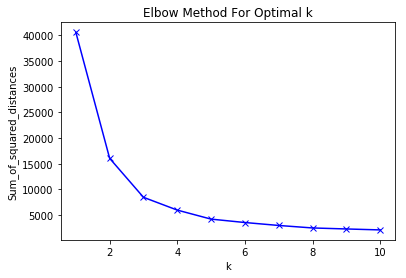

In [644]:
Sum_of_squared_distances = []
K = range(1,11)
for k in K:
    km = KMeans(n_clusters = k)
    km = km.fit(data1)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

* Optimal number of cluster is 3

### 1.3 K-means modelling

In [645]:
kmeans = KMeans(n_clusters = 3, max_iter =1000)
kmeans.fit(data1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

### 1.4 Clustering k-means result

In [646]:
labels = kmeans.predict(data1)
print(labels)

[1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 0 0 0 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2
 1 1 1 1 1 1 1 2 2 1 0 0 0 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 0
 0 1 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 0 0 1 1 1 0 0 0 0
 0 0 0 0 0 0 0 2 2 2 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 2 2 2 1 1 1 1 1 1 1
 1 1 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1
 1 1 1 1 2 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0]


In [667]:
centroids = kmeans.cluster_centers_
print(centroids)

[[106.74615385 190.64230769  68.49615385  55.76538462]
 [ 96.83448276 172.32758621  65.42844828  53.21034483]
 [ 93.55405405 156.12702703  63.77297297  52.47027027]]


### 1.5 Clustering k-means visualization

Text(0,0.5,'width')

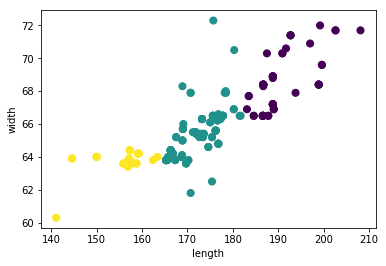

In [648]:
plt.scatter(data1["length"], data1["width"], c=labels, s=50, cmap='viridis')
plt.xlabel("length")
plt.ylabel("width")

Text(0,0.5,'height')

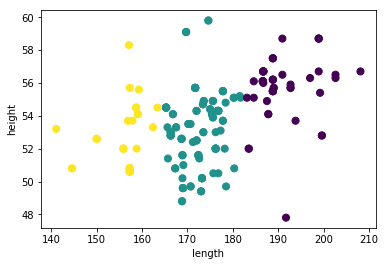

In [650]:
plt.scatter(data1["length"], data1["height"], c=labels, s=50, cmap='viridis')
plt.xlabel("length")
plt.ylabel("height")

Text(0,0.5,'wheel-base')

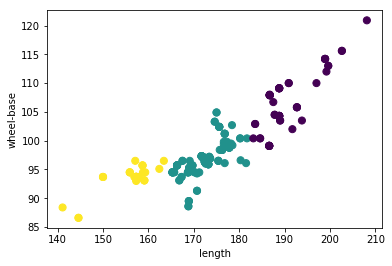

In [651]:
plt.scatter(data1["length"], data1["wheel-base"], c=labels, s=50, cmap='viridis')
plt.xlabel("length")
plt.ylabel("wheel-base")

### 1.6 Similarity matrix

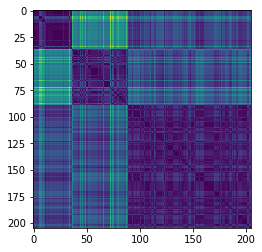

In [582]:
data_clustered = pd.DataFrame(data1)
data_clustered['cluster'] = pd.DataFrame(kmeans.labels_)
data_clustered = data_clustered.sort_values('cluster')
data_clustered = np.asarray(data_clustered)
from scipy.spatial.distance import cdist
dist = cdist(data_clustered[:,0:2],data_clustered[:,0:2], metric='euclidean')
plt.imshow(dist)
plt.show()

## 2 Hierarchical Clustering

### 2.1 Build data for hierarchical clustering

In [583]:
data_design.head()

,aspiration,num-of-doors,body-style,drive-wheel,engine-loc,wheel-base,length,width,height
0,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8
1,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8
2,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4
3,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3
4,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3


In [594]:
from sklearn.preprocessing import LabelEncoder
data_label = data_design
data_label["aspiration"] = LabelEncoder().fit_transform(data_label["aspiration"])
data_label["num-of-doors"] = LabelEncoder().fit_transform(data_label["num-of-doors"])
data_label["body-style"] = LabelEncoder().fit_transform(data_label["body-style"])
data_label["drive-wheel"] = LabelEncoder().fit_transform(data_label["drive-wheel"])
data_label["engine-loc"] = LabelEncoder().fit_transform(data_label["engine-loc"])
data_label.head()

,aspiration,num-of-doors,body-style,drive-wheel,engine-loc,wheel-base,length,width,height
0,0,2,0,2,0,88.6,168.8,64.1,48.8
1,0,2,0,2,0,88.6,168.8,64.1,48.8
2,0,2,2,2,0,94.5,171.2,65.5,52.4
3,0,1,3,1,0,99.8,176.6,66.2,54.3
4,0,1,3,0,0,99.4,176.6,66.4,54.3


In [595]:
data2 = np.asarray(data_label)

### 2.2 Hierarchical clustering 

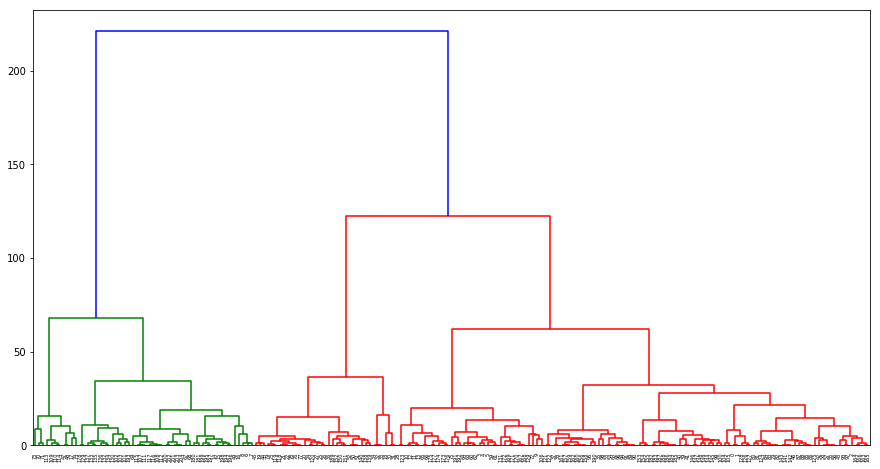

In [605]:
plt.figure(figsize = (15, 8))
dendrogram = sch.dendrogram(sch.linkage(data2, method = "ward"))

### 2.3 Evaluate the model

In [609]:
features = ["complete", "ward", "average"]
for feature in features:
    hc = AgglomerativeClustering(n_clusters = 3, affinity = "euclidean", linkage = feature)
    hc.fit(data2)
    labels = hc.labels_
    print(f"Linkage {feature} has score {silhouette_score(data2, labels)}")
    

Linkage complete has score 0.39461935809934406
Linkage ward has score 0.5148740180244068
Linkage average has score 0.5149408770654302


## 3. DBSCAN

### 3.1 Build data for DBSCAN
* we only use numerical data

In [612]:
data_dbscan = ["wheel-base", "length", "width", "height"]
data2 = data_design[data_dbscan]
data2.head()

,wheel-base,length,width,height
0,88.6,168.8,64.1,48.8
1,88.6,168.8,64.1,48.8
2,94.5,171.2,65.5,52.4
3,99.8,176.6,66.2,54.3
4,99.4,176.6,66.4,54.3


### 3.2 DBSCAN modelling

In [659]:
dbscan = DBSCAN(eps = 5)
dbscan.fit(data2)

DBSCAN(algorithm='auto', eps=5, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=1, p=None)

### 3.3 Clustering DBSCAN result

In [660]:
print(dbscan.labels_)

[ 0  0  0  0  0  0  1  1  1  0  0  0  0  0  1  1  1  2 -1  0  0  0  0  0
  0  0  0  0 -1  0 -1 -1 -1 -1 -1  0  0  0  0  0  0  0  0  0  0  0  0  2
  2 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1 -1 -1
  0 -1  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  1  1  2  2  1  1  2  2  1  1  1  0  0
  0  0  0 -1  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  1  1  0  0  0  0  0  0  0  0  0  0
  0  0  1  1  1  1  1  1  1  1  1  1  1]


### 3.4 Clustering DBSCAN visualization

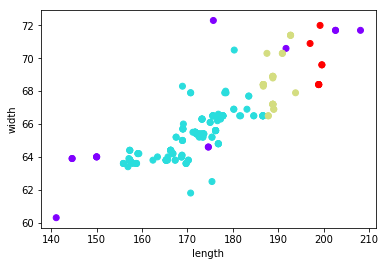

In [663]:
plt.scatter(data2["length"], data2["width"], c = dbscan.labels_ , cmap='rainbow')
plt.xlabel("length")
plt.ylabel("width")
plt.show()

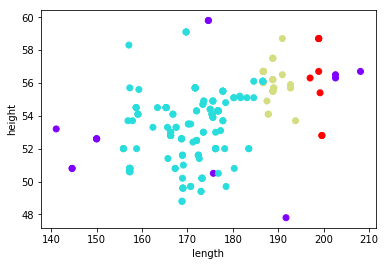

In [665]:
plt.scatter(data2["length"], data2["height"], c = dbscan.labels_ , cmap='rainbow')
plt.xlabel("length")
plt.ylabel("height")
plt.show()

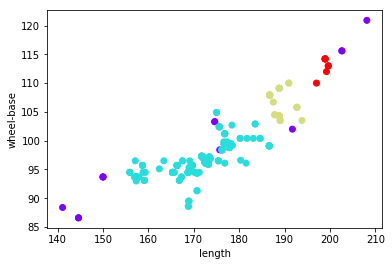

In [666]:
plt.scatter(data2["length"], data2["wheel-base"], c = dbscan.labels_ , cmap='rainbow')
plt.xlabel("length")
plt.ylabel("wheel-base")
plt.show()

***
## Part 2 - Car Specification

***
Due to time constraints, the process cannot be continued. Basically for clustering process on the data car specification is has a similar way with clustering process on the data car design. From the clustering results from each data, we can calculate the average price of a car in each cluster, where the results can be used to predict the price of cars based on design and specification or as a manufacturer we can make the design and the specification of car at optimal prices by utilizing The clustering result.
***

## Summary

1. From the clustering process above, we use 3 numbers of cluster, the attributes that used are data car design and data car specification. We use that attributes to figure out the average price of each design cluster and each specification clusters that can be usefull for market strategy.

2. I choose K-means algorithm because it has better results than hierarcical clustering and can get more information than the other 2 algorithms. We can easily determine the number of clusters that we want to use and also can easily determine the center point of each cluster.

3. In the clustering process using K-Means algorithm, we do not use categorical data because the variances of categorical data is not too much (only 0 or 1) so that when we do distance calculation will not be has a significant result, so we only use numerical data. K-Means algorithm need parameter such as the number of K. In the clustering process using Hierarchical algorithm we can use both categorical and numerical data, but it is hard to find the best number of cluster. Hierarchical algorithm need parameter such as linkage type and distance method/affinity. In the clustering process using DBSCAN algorithm, we can determine the noise from the clustering result, but it is hard to find the best number of cluster. DBSCAN algorithm need parameter such as epsilon and minimal sampel.